In [2]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 107.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


Steps - Load the dataset -> feature extraction -> data visulaization -> data cleaning -> train test split -> model building -> model training -> model evaluation -> model saving -> streamlit application deploy

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/twitter_sentiment.csv', header = None, index_col = 0)
df.head()

,1,2,3
0,,,
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


# **Feature Extraction**

In [5]:
df = df[[2,3]].reset_index(drop = True) #as we need only 2nd and 3rd columns

In [6]:
df.columns = ['sentiment', 'text'] #naming the columns
df.head(3)

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [8]:
df.isnull().sum()  #checks for null value
df.dropna(inplace = True)

In [9]:
sum(df['text'].apply(len)>5), sum(df['text'].apply(len)<=5) #finding the number of tweets having value less than and greater than 5

(72883, 2113)

In [10]:
print(df.shape) #before size
df = df[df['text'].apply(len)>5] #filtering the tweets having value <5
print(df.shape) #after size

(74996, 2)
(72883, 2)


In [11]:
df.sample(10)

,sentiment,text
42530,Positive,Coming to @ PUBG with @ gtuckgaming and the te...
69600,Irrelevant,Huge. Was thinking about playing 2077 on PC as...
14709,Neutral,.@s4dota unmutes his teammate bit.it/j2r875
52237,Positive,"Mass Effect, Red dead redemption, Batman Arkha..."
20326,Positive,Very freaking excited for the Warcraft 3 Onlin...
2696,Neutral,Credit: @ HNSOfficial _ @ ModernWarzone
34155,Negative,Ur game sucks RhandlerR pic.twitter.com/0ZV0Qg...
72037,Neutral,You really can never trust a random lol
71014,Neutral,One full year ago I made this other one and it...
68110,Negative,"Now cyberpunk 2077 is begging, pleading for me..."


In [12]:
df['sentiment'].value_counts()

Negative      22020
Positive      20186
Neutral       17899
Irrelevant    12778
Name: sentiment, dtype: int64

# **Preprocessing**

In [13]:
!git clone https://github.com/laxmimerit/preprocess_kgptalkie

Cloning into 'preprocess_kgptalkie'...
remote: Enumerating objects: 101, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 101 (delta 62), reused 48 (delta 26), pack-reused 0
Receiving objects: 100% (101/101), 20.75 KiB | 6.92 MiB/s, done.
Resolving deltas: 100% (62/62), done.


In [14]:
%cd preprocess_kgptalkie/

/content/preprocess_kgptalkie


In [15]:
!pip install .

Processing /content/preprocess_kgptalkie
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7602 sha256=8316be3a68cf507b88f891bd98c9582129e2f7cd65d7e4a504d7b7cb1f7e268e
  Stored in directory: /tmp/pip-ephem-wheel-cache-eh2d6djc/wheels/72/7b/70/84e809f0127ca915bdaa3ec85a6f83f636d4af940f8178c55f
Successfully built preprocess-kgptalkie


In [16]:
import preprocess_kgptalkie as ps
df.columns

Index(['sentiment', 'text'], dtype='object')

In [17]:
df = ps.get_basic_features(df)

In [18]:
df.columns #adding some more columns

Index(['sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

In [19]:
df.head()

,sentiment,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,Positive,im getting on borderlands and i will murder yo...,43,11,3.909091,6,0,0,1,0
1,Positive,I am coming to the borders and I will kill you...,40,12,3.333333,6,0,0,1,2
2,Positive,im getting on borderlands and i will kill you ...,41,10,4.100000,5,0,0,1,0
3,Positive,im coming on borderlands and i will murder you...,42,10,4.200000,5,0,0,1,0
4,Positive,im getting on borderlands 2 and i will murder ...,46,12,3.833333,6,0,0,2,0


# **Data Visualization**

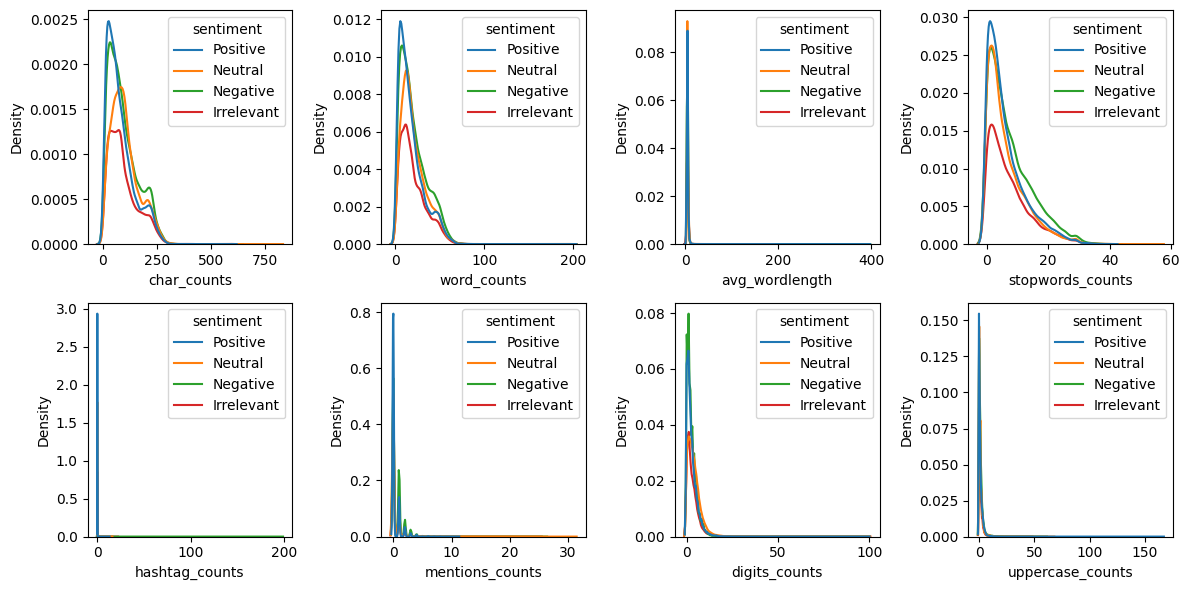

In [20]:
#plotting the 4 sentiments to check their distribution in dataset
# also visualize the 8 extra features(columns) we have added

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12,6))
num_cols = df.select_dtypes(include = 'number').columns  #for getting numerical columns (bsically 8 features)

for index, col in enumerate(num_cols):
  plt.subplot(2,4, index+1)
  sns.kdeplot(data = df, x = col, hue = "sentiment")

plt.tight_layout()
plt.show()

In [21]:
import matplotlib.pyplot as plt

In [22]:
#!pip install --upgrade matplotlib


<Axes: ylabel='sentiment'>

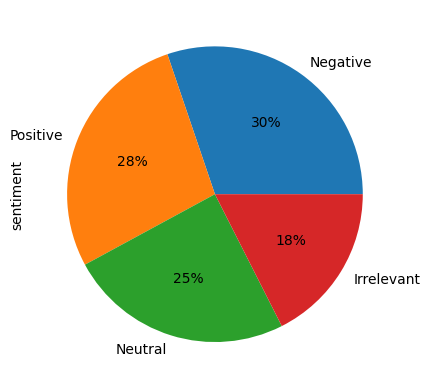

In [23]:

df['sentiment'].value_counts().plot(kind = 'pie', autopct = "%1.0f%%")

# **Word Cloud**

In [24]:
#most significant words

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

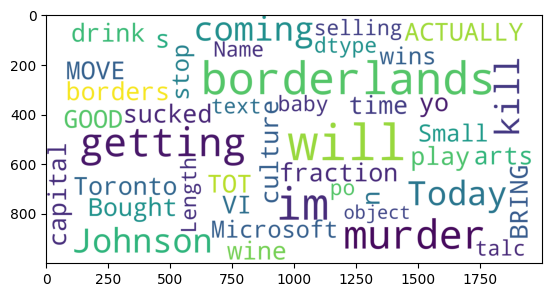

In [25]:
wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, max_words = 300, max_font_size = 40, scale = 5).generate(str(df['text']))
plt.imshow(wordcloud)

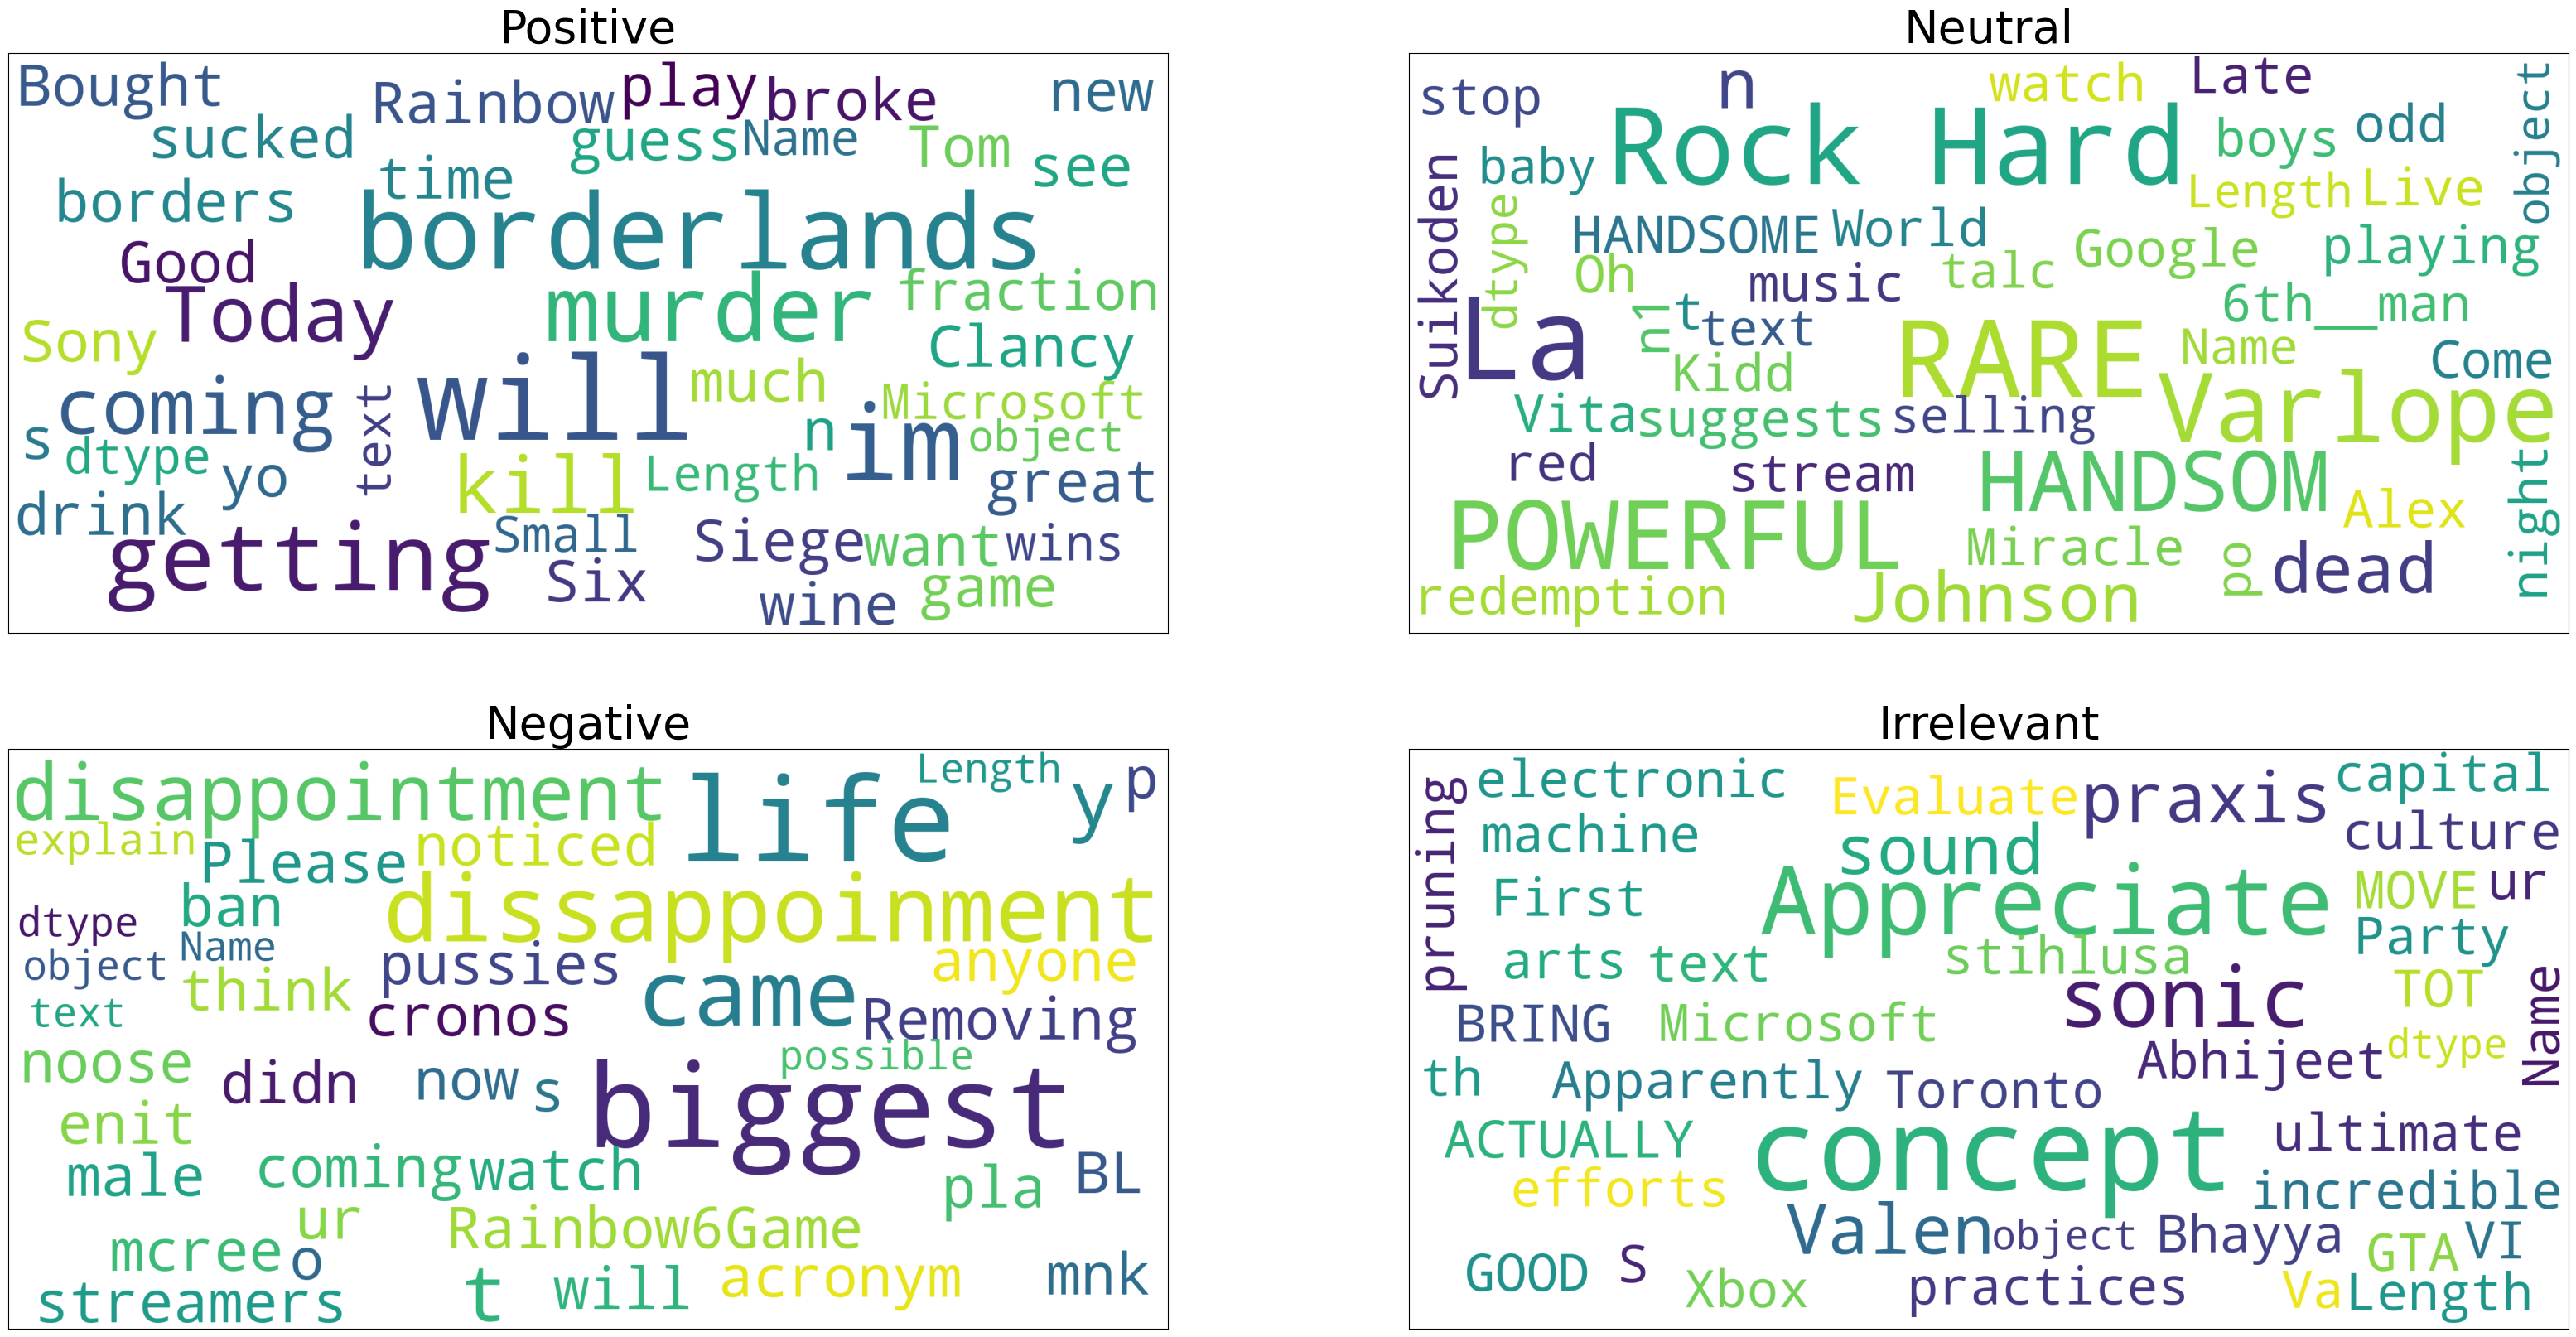

In [26]:
#now making separate clouds for each sentiment
plt.figure(figsize = (40,20))

for index, sent in enumerate(df['sentiment'].unique()):
  plt.subplot(2,2,index+1)

  data = df[df['sentiment'] == sent]['text']
  wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, max_words = 300, max_font_size = 40, scale = 5).generate(str(data))
  plt.imshow(wordcloud)
  plt.xticks([])
  plt.yticks([])
  plt.title(sent, fontsize = 40)

# **Data Cleaning**

In [ ]:
df['text'] = df['text'].apply(lambda x: x.lower()) #converting everything to lowercase
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x: ps.remove_html_tags(x))
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))

In [28]:
#train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size = 0.2, random_state = 0)

In [29]:
X_train.shape, X_test.shape

((58306,), (14577,))

# **Model Building and Testing**

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline



In [36]:
clf = Pipeline([('tfidf', TfidfVectorizer()),('rfc', RandomForestClassifier(n_jobs = -1))])
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [37]:
#evaluating model
from sklearn.metrics import classification_report


In [38]:
y_pred= clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.98      0.87      0.92      2561
    Negative       0.92      0.96      0.94      4481
     Neutral       0.95      0.93      0.94      3553
    Positive       0.91      0.95      0.93      3982

    accuracy                           0.94     14577
   macro avg       0.94      0.93      0.93     14577
weighted avg       0.94      0.94      0.93     14577



In [46]:
import pickle
pickle.dump(clf, open("twitter_sentiment.pkl", 'wb'))

In [43]:
clf.predict(['I have played borderland'])

array(['Positive'], dtype=object)

In [45]:
%cd /content

/content
